In [1]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    print("CUDA is available. PyTorch can use the GPU.")
    print("Number of available GPUs:", torch.cuda.device_count())
    print("Current GPU device:", torch.cuda.current_device())
    print("GPU Name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA is not available. PyTorch will use the CPU.")


CUDA is available. PyTorch can use the GPU.
Number of available GPUs: 1
Current GPU device: 0
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import numpy as np 
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

In [7]:
X_train = [] 
Y_train = []
X_test = []
Y_test = []

trainpath = r'C:\Users\91623\Desktop\Brain_tumor_research\Training'
testpath = r'C:\Users\91623\Desktop\Brain_tumor_research\Testing'

image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join(trainpath,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(testpath,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        Y_test.append(i)

In [9]:
import torch
print(torch.cuda.is_available())


True


In [40]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from torch.cuda.amp import autocast, GradScaler

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Define the model
# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.dropout = nn.Dropout(0.3)
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(128*17*17, 512)
#         self.fc2 = nn.Linear(512, 512)
#         self.fc3 = nn.Linear(512, 4)

#     def forward(self, x):
#         x = torch.relu(self.conv1(x))
#         x = torch.relu(self.conv2(x))
#         x = self.pool(x)
#         x = self.dropout(x)
#         x = torch.relu(self.conv2(x))
#         x = torch.relu(self.conv2(x))
#         x = self.pool(x)
#         x = self.dropout(x)
#         x = torch.relu(self.conv2(x))
#         x = torch.relu(self.conv2(x))
#         x = torch.relu(self.conv2(x))
#         x = self.pool(x)
#         x = self.dropout(x)
#         x = torch.relu(self.conv2(x))
#         x = torch.relu(self.conv2(x))
#         x = self.pool(x)
#         x = self.dropout(x)
#         x = self.flatten(x)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.fc3(x)
#         return x

# # Assuming X_train and y_train are numpy arrays
# train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2), torch.tensor(Y_train, dtype=torch.long))
# val_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2), torch.tensor(Y_test, dtype=torch.long))

# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# # Model and optimizer
# model = CNNModel().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters())

# # Mixed precision training
# scaler = GradScaler()

# # Training loop
# epochs = 20
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
        
#         with autocast():
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
        
#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()
        
#         running_loss += loss.item() * inputs.size(0)
    
#     epoch_loss = running_loss / len(train_loader.dataset)
#     print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')
    
#     # Validation loop
#     model.eval()
#     val_loss = 0.0
#     correct = 0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             with autocast():
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)
#             val_loss += loss.item() * inputs.size(0)
#             _, predicted = torch.max(outputs, 1)
#             correct += (predicted == labels).sum().item()
    
#     val_loss /= len(val_loader.dataset)
#     val_accuracy = correct / len(val_loader.dataset)
#     print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}')


TypeError: can't convert np.ndarray of type numpy.str_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [13]:
!nvidia-smi

Mon Jun 17 23:25:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.97                 Driver Version: 531.97       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 L...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8                8W /  N/A|   3437MiB /  4096MiB |     14%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64,(3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3), activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3), activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3), activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4, activation='softmax')) 

# model.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

# history = model.fit(X_train, y_train, epochs = 20, validation_split=0.1)


c:\Users\91623\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.3315 - loss: 3.6568 - val_accuracy: 0.5875 - val_loss: 0.9618
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6654 - loss: 0.8052 - val_accuracy: 0.7004 - val_loss: 0.7382
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.7679 - loss: 0.5583 - val_accuracy: 0.7763 - val_loss: 0.5320
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8105 - loss: 0.4742 - val_accuracy: 0.7160 - val_loss: 0.6788
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8424 - loss: 0.4129 - val_accuracy: 0.8210 - val_loss: 0.4967
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8493 - loss: 0.3837 - val_accuracy: 0.7549 - val_loss: 0.5864
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8801 - loss: 0.3251 - val_accuracy: 0.7840 - val_loss: 0.6509
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8936 - loss: 0.2812 - val_accu

In [33]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Saving the model
model.save('Brain-Tumor-Classification.h5')


In [36]:
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

{'accuracy': [0.4288802444934845, 0.6990920901298523, 0.7732382416725159, 0.8203631639480591, 0.8469520211219788, 0.8495460152626038, 0.8724600076675415, 0.8955901265144348, 0.8953740000724792, 0.9109382033348083, 0.9185041189193726, 0.9288802146911621, 0.9327712655067444, 0.9524427056312561, 0.9520103931427002, 0.9595763087272644, 0.9595763087272644, 0.9619541764259338, 0.963683545589447, 0.9708171486854553], 'loss': [1.7227650880813599, 0.7345936298370361, 0.5476977229118347, 0.45396509766578674, 0.398745596408844, 0.37796759605407715, 0.32902124524116516, 0.2727947533130646, 0.2572867274284363, 0.23136791586875916, 0.2104281187057495, 0.18699268996715546, 0.17895005643367767, 0.1254805624485016, 0.1300344169139862, 0.11738850921392441, 0.1250382959842682, 0.10828641802072525, 0.0993649885058403, 0.08102533966302872], 'val_accuracy': [0.5875486135482788, 0.7003890872001648, 0.7762646079063416, 0.7159532904624939, 0.8210116624832153, 0.7548637986183167, 0.7840467095375061, 0.727626442

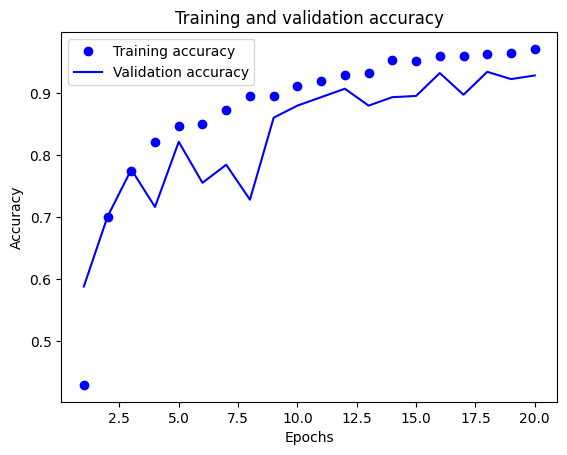

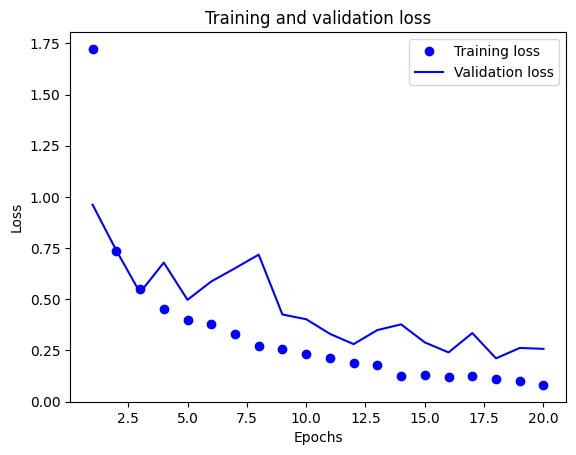

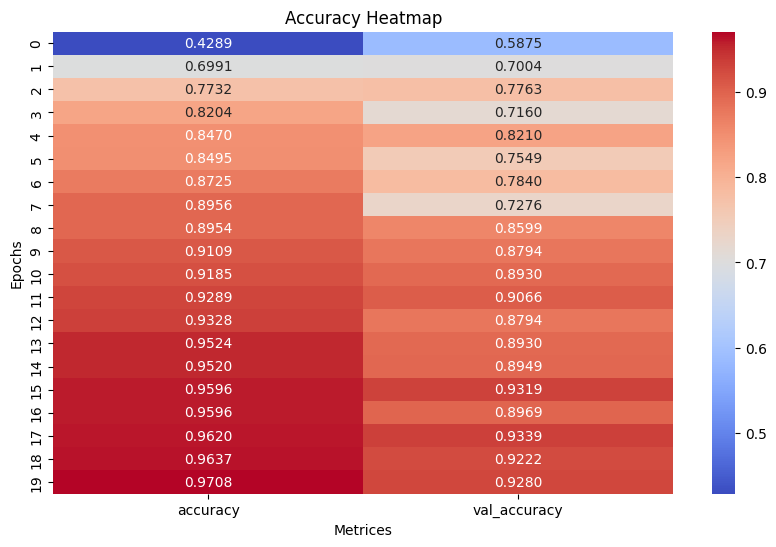

None


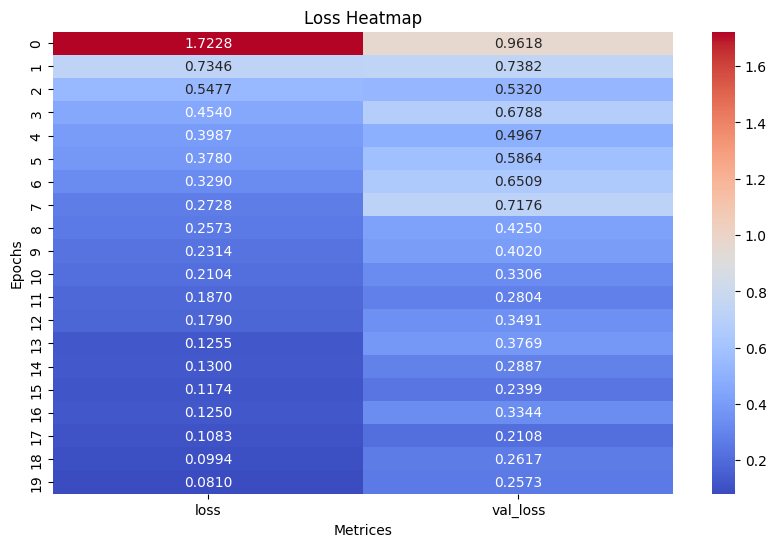

None


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
print(history)
acc = history['accuracy']
val_acc = history['val_accuracy']
epochs= range(len(acc))
accuracy = history['accuracy']
loss = history['loss']
val_accuracy = history['val_accuracy']
val_loss = history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

history_df = pd.DataFrame(history)

plt.figure(figsize=(10,6))
sns.heatmap(history_df[['accuracy','val_accuracy']], annot = True, fmt='.4f', cmap ='coolwarm')
plt.title('Accuracy Heatmap')
plt.xlabel('Metrices')
plt.ylabel('Epochs')
print(plt.show())

plt.figure(figsize=(10,6))
sns.heatmap(history_df[['loss','val_loss']], annot = True, fmt='.4f', cmap='coolwarm')
plt.title('Loss Heatmap')
plt.xlabel('Metrices')
plt.ylabel('Epochs')
print(plt.show())
